<b>Problem Statement:</b> Concrete Strength Prediction


<b>Objective:</b>
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

<b>Resources Available:</b>
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

<b>Attribute Information:</b>
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

<b>Name	Data Type	Measurement	Description</b>
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable
 

<b>Steps and Tasks:</b>

<b>Exploratory Data Quality Report Reflecting the Following:  </b>

- Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
- Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
- Using various plots, write the insights/observations about it. (6 Marks)
- Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)

<b> Feature Engineering techniques </b>

- Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)
- Get the data model ready and do a train test split.
- Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

<b>Creating the Model and Tuning It:</b>
- Algorithms that you think will be suitable for this project.
- Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)
- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)
- Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)
- Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)
- The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

### NOTE: I have created multiple models based on different Feature engineering... Please go through the entire ipynb file

In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

random_state = 42
np.random.seed(random_state)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [127]:
cdf = pd.read_csv('concrete.csv')
print(cdf.shape)
cdf.head()

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<b>Observations</b>
- All the columns are numeric columns
- Target variable is strength
- Need to perform regression analysis. A supervised learning as target variable is given
- We have 9 columns (8 independent variables and 1 dependent variable)
- Number of rows are 1030

In [3]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<b>Observations</b>
- Data types are all numeric (float, int)
- No missing values found

In [4]:
cdf.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<b>Observations</b>
- Cement: Mean (281) > Median (~273) so distribution is right skewed. Standard deviation is 104.5. This doesnt seem to have outliers. Range is 102- 540. The mean is 281.16. Median is 272.90. The standard deviation value is 104.50

- slag: Mean (~74) > Median (22). So distribution is heavily right skewed. 25% of data has slag in kgs as 0. This seems to have outliers. Range of is 0- 359.40 . The mean is 73.89. The median is 22. The standard deviation value is 86.27. A minimum value of zero means Slag is not used/added in that particular concrete mixture record.

- ash: Mean (~54) > Median (0). So distribution is right skewed. 50% of data has ash in Kgs as 0. Ash ranges from 0 to 200Kgs. This might have 2 bell curves.Range is 0-200. Difference between the mean 54.18 and median 0 values is very high. The standard deviation value 64 is also high.  A minimum value of zero means Ash is not used/added in that particular concrete mixture record.

- water: Mean (~181) < Median (185). So distribution is left skewed. This also has outliers based on 1.5(Q3-Q1) and max is greater than this value. Range is 121.8-247. The mean is 181.56 and median is 185

- superplastic: Mean is similar to median. But 25% of data has 0. max is greater than 1.5(IQR). So it has outliers and skewed. range of this attribute is 0-32.20. Difference between the mean 6.2 and median 6.4 values is negligible. The standard deviation value is ~6.  A minimum value of zero means superplastic is not used/added in that particular concrete mixture.

- coarseagg: Mean is similar to median. No outliers. range of this attribute is 801-1145 . The mean ~ 973 and median 968 values differ slightly. The standard deviation value is 77.75

- fineagg: Mean is similar to median. Seems to have outliers based on 1.5(Q3-Q1) and max. range of this attribute is 594-992. The mean~773 and median 779 values differ slightly. The standard deviation value is 80.17

- age: Mean (~46) > Median (28). So distribution is heavily right skewed. Also max > 1.5(IQR). So it has lot of outliers. range of this attribute is 1-365 days. The mean ~46 and median 28 values differ significantly. The standard deviation value is ~ 63 which is quite high. For 75% of the given observations, this value is 56 days

- strength: Mean is similar to median. Seems to have outliers based on 1.5(Q3-Q1) and max

In [5]:
#Checking for NUll or NAs
print(cdf.isnull().sum())
print(cdf.isna().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


<b>Observation</b>
- No Null or NA values in the data

In [6]:
#Checking for duplicates
cdf[cdf.duplicated()].count()

cement          25
slag            25
ash             25
water           25
superplastic    25
coarseagg       25
fineagg         25
age             25
strength        25
dtype: int64

<b>Observation</b>
- There are 25 duplicate records which needs to be deleted

In [128]:
#drop duplicates
cdf.drop_duplicates(inplace=True)
cdf.shape

(1005, 9)

In [8]:
cdf.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Setting aside some data for Testing

In [9]:
data = cdf.drop(['strength'],axis=1)
label = cdf['strength'].copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(673, 8)
(673,)
(332, 8)
(332,)


In [11]:
df = X_train.copy()
target = y_train.copy()

In [12]:
combined = X_train.copy()
combined['strength'] = y_train.copy()
combined

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
563,289.0,0.0,0.0,192.0,0.0,913.2,895.3,28,25.57
313,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,270,74.17
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
580,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100,44.21
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
...,...,...,...,...,...,...,...,...,...
106,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28,9.74
270,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16
878,237.5,237.5,0.0,228.0,0.0,932.0,594.0,270,38.41
439,255.0,0.0,0.0,192.0,0.0,889.8,945.0,3,8.20


#### Univariate Analysis

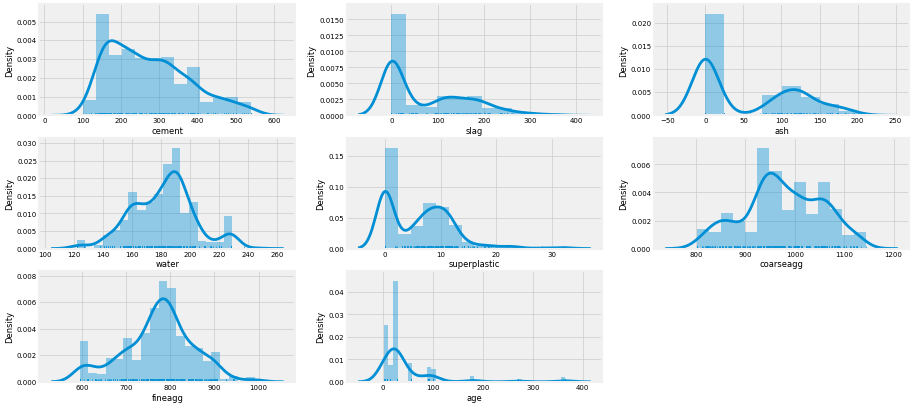

In [13]:
numcols = list(df.columns)

fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numcols[i]],rug=True)
    plt.xlabel(numcols[i])

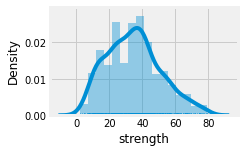

In [14]:
plt.rcParams["figure.figsize"] = (3,2)
sns.distplot(target,rug=True);

<b>Observations</b>
- Cement: Distribution is right skewed.
- slag: Distribution is heavily right skewed. Because of significant number of zeros, we have 2 peaks in the data. This seems to have outliers
- ash: Distribution is right skewed. Because of significant number of zeros, we have 2 peaks in the data.
- water: Distribution is left skewed. This also has outliers on both the ends
- superplastic: Distribution is right skewed. Mean is similar to median. Because of significant number of zeros, we have 2 peaks in the data. This seems to have outliers
- coarseagg: No outliers. not very skewed
- fineagg: few outliers towards right. not very skewed
- age: Distribution is heavily right skewed. Lot of outliers and multiple peaks
- strength: Kind of normally distributed. Few outliers towards right.

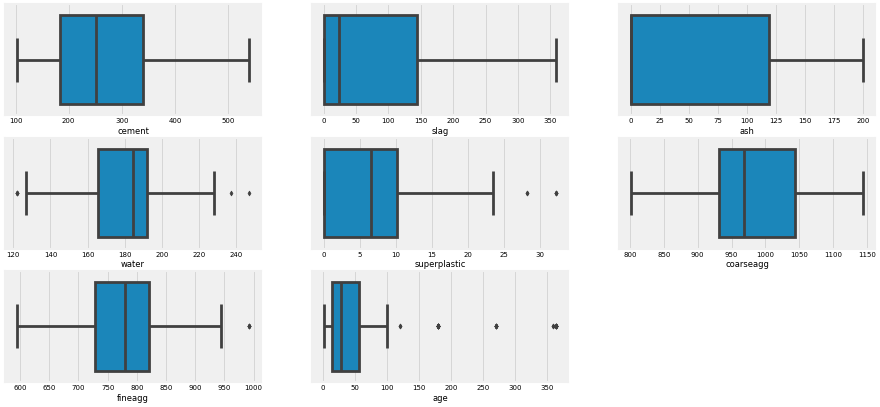

In [15]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[numcols[i]])
    plt.xlabel(numcols[i])

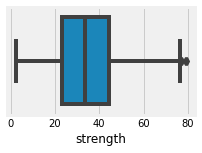

In [16]:
plt.rcParams["figure.figsize"] = (3,2)
sns.boxplot(target);

<b>Observations</b>
- Outliers in Water, superplastic, fineagg, age, strength
- signigicant outliers in age. we have to treat outliers using binning

In [17]:
from scipy import stats; from scipy.stats import zscore, norm, randint
def uni_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'aqua')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'orange', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:green', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

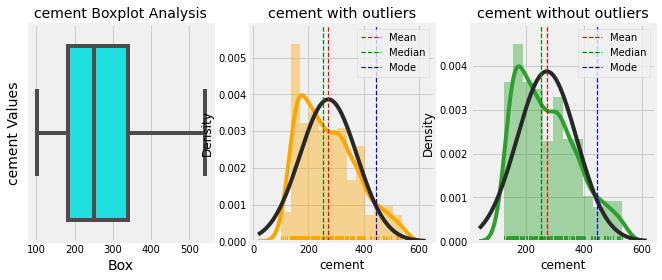

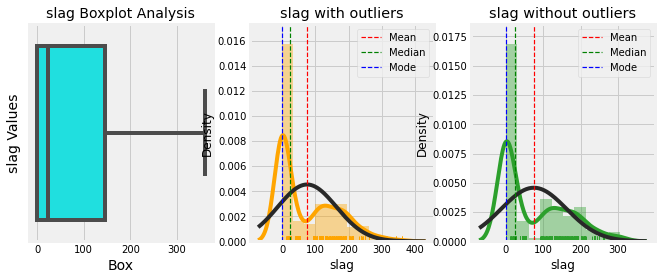

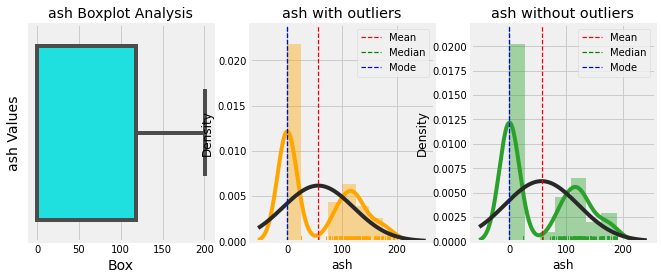

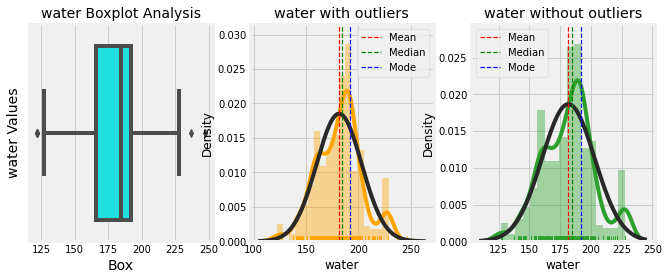

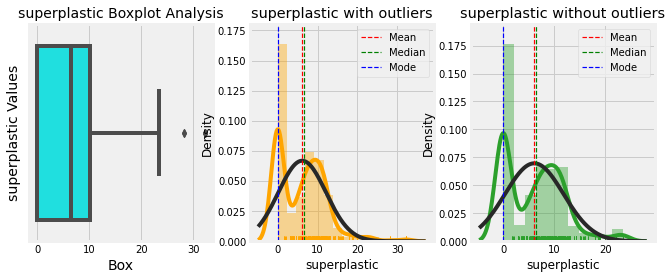

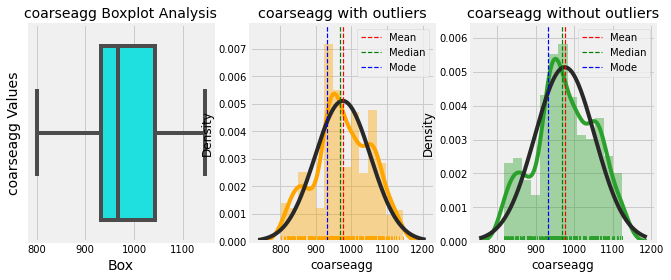

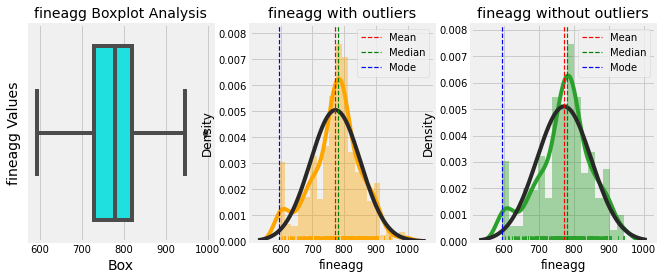

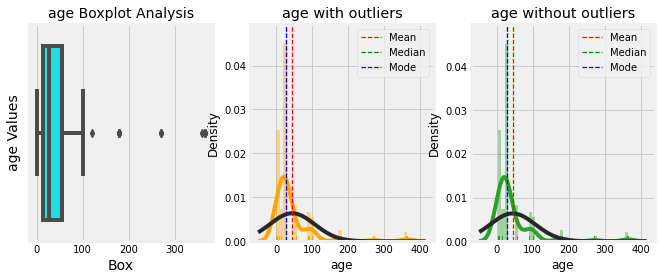

In [18]:
for cols in df.columns:
    uni_plots(df, cols)

#### Pair Plot

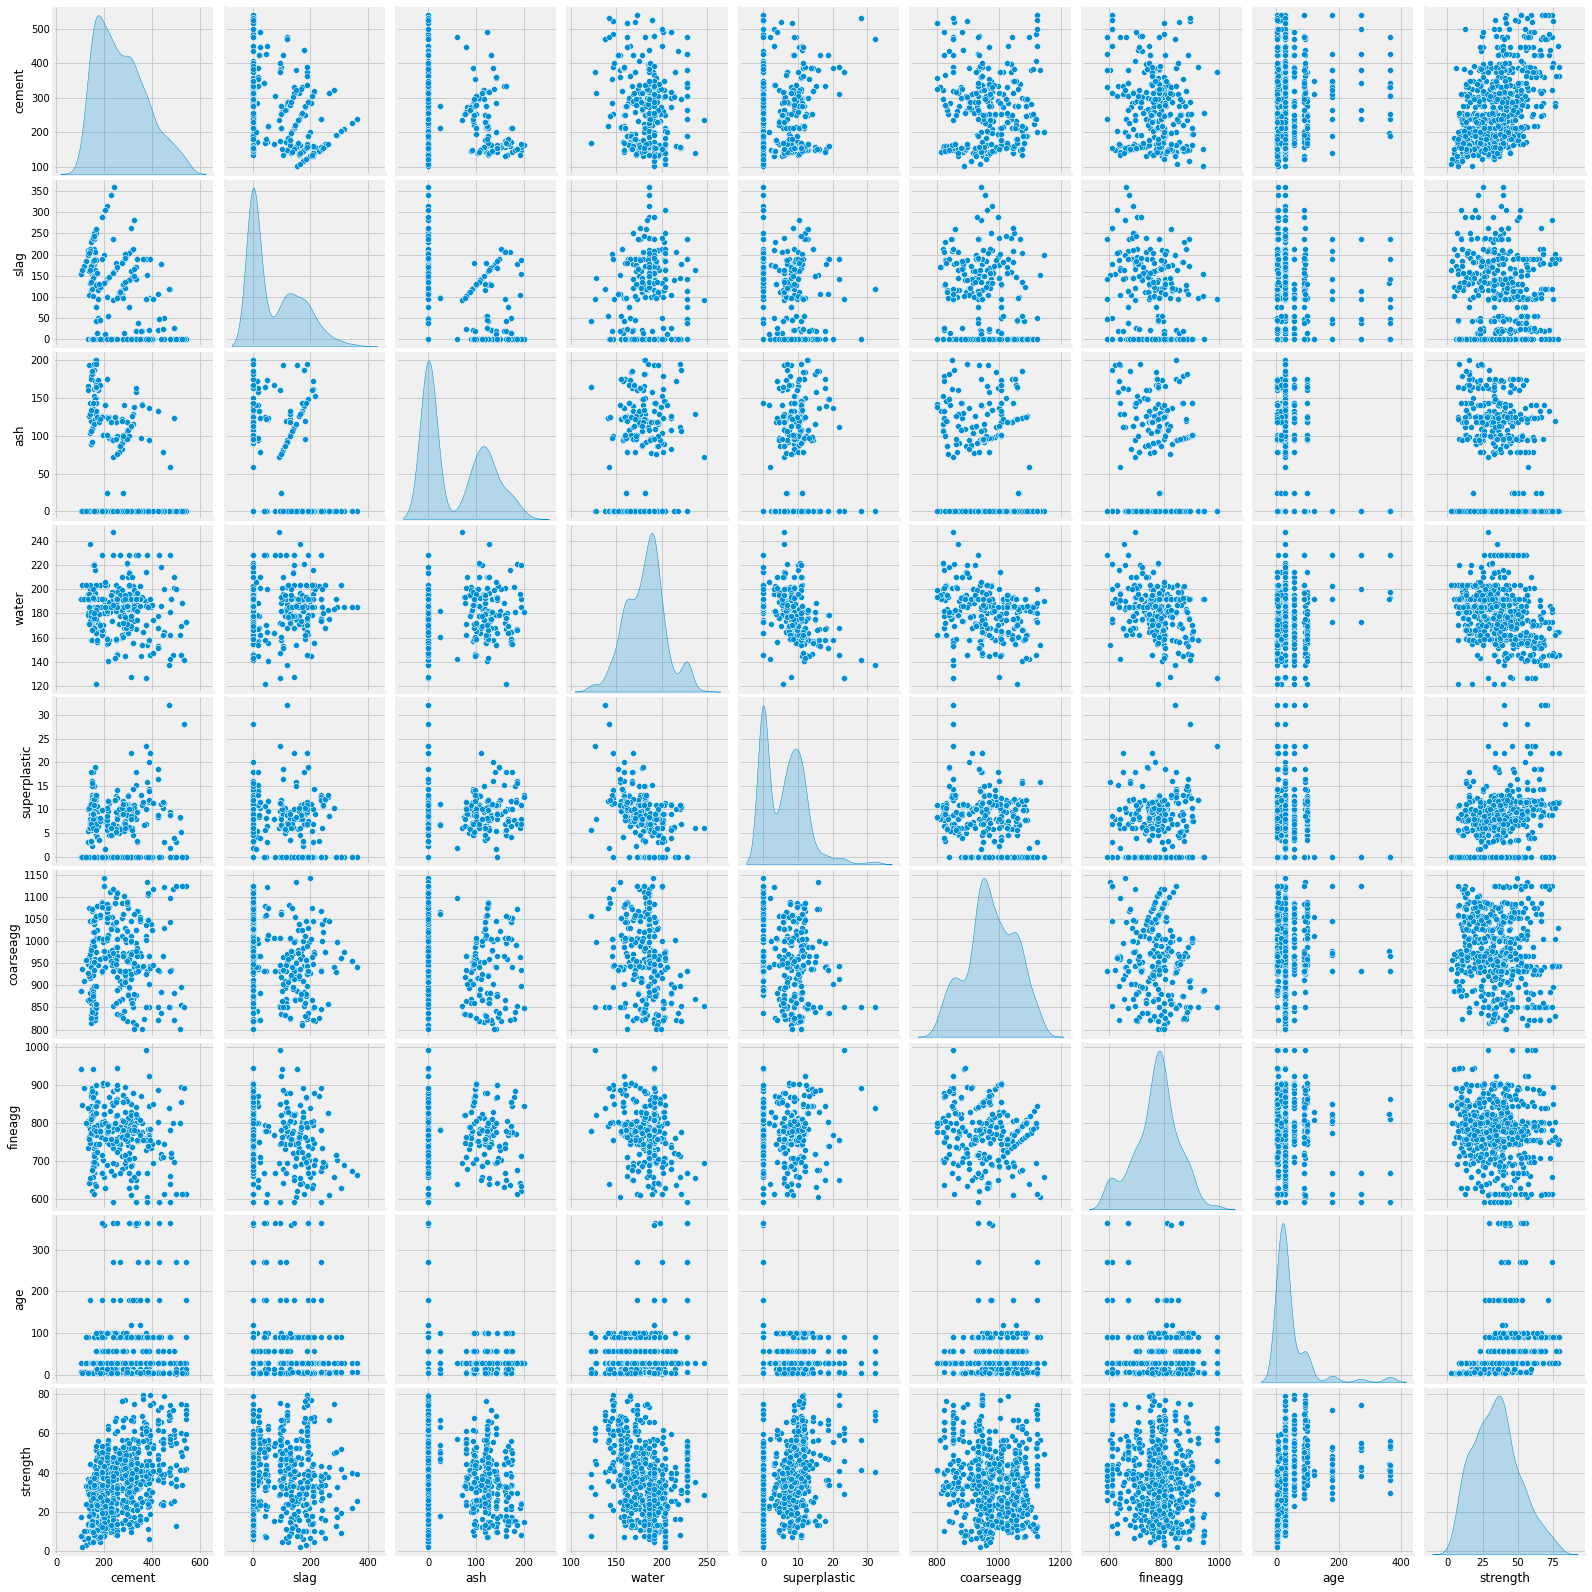

In [19]:
sns.pairplot(combined, diag_kind='kde');

<b>Observation</b>
- Cement and Strength are kind of linear
- strength do not show any kind of relationship with other independent attributes except cement and superplastic.
- water seems to be negatively related with strength
- age do not show any relation with other independent attributes
- fineagg, coarseagg and superplastic shows slight negative linear relationship with water
- Except for strength and cement attributes, density curves for most of the attribute show multiple peaks

<b>Correlation Plot</b>

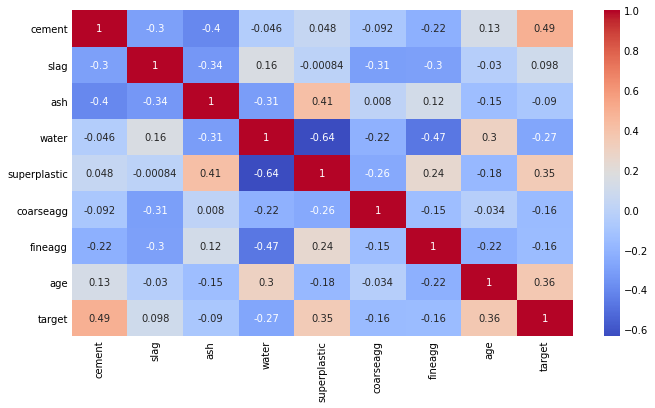

target          1.000000
cement          0.494067
age             0.363918
superplastic    0.347185
slag            0.097968
ash            -0.089771
fineagg        -0.158088
coarseagg      -0.164038
water          -0.273013
Name: target, dtype: float64


In [20]:
#Corr plot
df['target']= y_train
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');
plt.show()
print(df.corr()['target'].sort_values(ascending=False))
df.drop('target',axis=1,inplace=True)

<b>Observation</b>
- Cement, Superplastic, Age have +ve corr with Strength (0.49, 0.35, 0.36)
- Water has -ve corr with Strength (-0.27); Water and superplastic are -vely corr (-0.64)
- Superplastic and ash are +ve correlated (0.41)
- Water and Age are +ve correlated (0.3)
- fineagg and superplastic are +ve corr (0.24); fineagg and water are -ve corr (-0.47); fineagg and slag ar -ve corr (-0.3)
- slag is -ve correlated with cement (-0.3), ash (-0.4), coarseagg (-0.31) and fineagg (-0.3)

#### Bivariate analysis

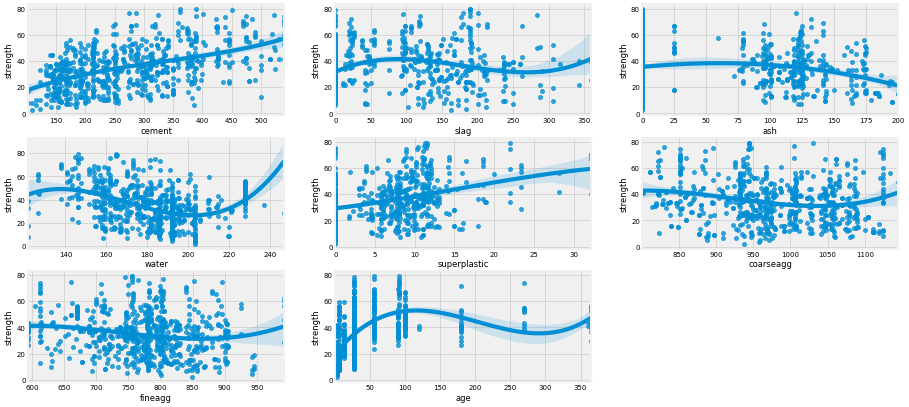

In [21]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(3,3,i+1)
    sns.regplot(x=combined[numcols[i]], y=combined['strength'], data=combined,order=3);
    plt.xlabel(numcols[i])

<b>Observation</b>
- strength and cement have a near linear relationship
- Concrete compressive strength of concrete is a highly nonlinear function of age and ingredients

#### Checking for Outliers

In [22]:
q1=combined.quantile(0.25)
q3=combined.quantile(0.75)
IQR=q3-q1
outlier=((combined.iloc[:] <(q1-1.5*IQR))|(combined.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
df_outlier=pd.DataFrame(outlier,index=combined.columns,columns=['No. of Outliers'])
df_outlier['Percentage Outliers']=round(df_outlier['No. of Outliers']*100/len(combined),2)
df_outlier

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,0,0.00
ash,0,0.00
water,6,0.89
superplastic,6,0.89
coarseagg,0,0.00
fineagg,5,0.74
age,39,5.79
strength,5,0.74


<b>Observations</b>
- There are Outliers in Water, superplastic, fineagg, age and strength. We will handle these outliers

### Feature Engineering:
Binning features

In [23]:
# bin_edges=[-1,0.9,10,20,35]
# bin_names=['0','1-10','11-20','21-35']
# # Names of each bin or category
# df['superplastic_bin'] = pd.cut(df['superplastic'],bin_edges,labels=bin_names)

In [24]:
# df.drop('superplastic_bin',axis=1, inplace=True)

In [25]:
# bin_edges=[0,30,60,90,120,150,180,210,240,270,300,330,365]
# bin_names=[1,2,3,4,5,6,7,8,9,10,11,12]
# bin_edges=[0,14,28,56,365]
# bin_names=['0.5','1','2','>2']
# # Names of each bin or category
# df['age_month'] = pd.cut(df['age'],bin_edges,labels=bin_names)

# df.drop('age',axis=1,inplace=True)

# df["age_month"] = df["age_month"].astype('int64')
# df.dtypes

In [26]:
#check missing values row wise:
# df[df.isnull().any(axis=1)].head()

Observation: Binning did not help in overall model prediction capabilities. So commented the code

<b>Applying Transformations and adding new features</b>

In [27]:
# df['superplastic_log'] = df['superplastic'].apply(np.log1p)
# df['ash_log'] = df['ash'].apply(np.log1p)
# df['slag_log'] = df['slag'].apply(np.log1p)
# # df['water_log'] = df['water'].apply(np.log1p)
# # df['fineagg_log'] = df['fineagg'].apply(np.log1p)
# # df['coarse_log'] = df['coarseagg'].apply(np.log1p)
# # df['cement_log'] = df['cement'].apply(np.log1p)
df['water:cement'] = df['water']/df['cement']
df['coarseagg:fineagg'] = df['coarseagg'] / df['fineagg']
df.drop(['water','cement','coarseagg','fineagg'],axis=1,inplace=True)
df.head()

,slag,ash,superplastic,age,water:cement,coarseagg:fineagg
563,0.0,0.0,0.0,28,0.664360,1.019993
313,0.0,0.0,0.0,270,0.320370,1.835237
1023,212.0,0.0,0.0,7,1.440198,1.298330
580,0.0,118.3,6.4,100,0.749801,1.357265
0,212.0,0.0,0.0,28,1.440198,1.298330


had to comment out because new features introduced multicollinearity and model performance is low

In [28]:
numcols = list(df.columns)
for i in numcols:
    df[i] = df[i].apply(np.log1p)

#### Using Quantile Transformer for scaling training features

In [29]:
df_withoutScale = df.copy()
from sklearn.preprocessing import MinMaxScaler
# cols_stnd = ['slag', 'ash', 'superplastic','age', 'water:cement','coarseagg:fineagg']
cols_stnd=numcols
# normalize traning set
scaler = MinMaxScaler()
scaler.fit_transform(df[cols_stnd])
df.loc[:,cols_stnd] = scaler.transform(df[cols_stnd])

# # normalize test set
# X_test.loc[:,cols_stnd] = scaler.transform(X_test[cols_stnd])

In [30]:
df.head()

,slag,ash,superplastic,age,water:cement,coarseagg:fineagg
563,0.000000,0.00000,0.000000,0.513323,0.331947,0.191053
313,0.000000,0.00000,0.000000,0.942314,0.050296,0.968175
1023,0.910667,0.00000,0.000000,0.266110,0.797421,0.486948
580,0.000000,0.90155,0.571435,0.752852,0.392846,0.544985
0,0.910667,0.00000,0.000000,0.513323,0.797421,0.486948


### Transforming Testing set (treating outliers and scaling)

In [31]:

X_test_beforeoutliers = X_test.copy()
X_test['water:cement'] = X_test['water']/X_test['cement']
X_test['coarseagg:fineagg'] = X_test['coarseagg'] / X_test['fineagg']
X_test.drop(['water','cement','coarseagg','fineagg'],axis=1,inplace=True)

for i in numcols:
    X_test[i] = X_test[i].apply(np.log1p)

# def handle_outliersTest(dftest):
#     for i,cols in enumerate(list(dftest.columns)):
# #         dftest.loc[(dftest[cols]<handle_outliers.iloc[i,1]) | (dftest[cols]>handle_outliers.iloc[i,2]), cols] = handle_outliers.iloc[i,3]
#         dftest.loc[dftest[cols]<handle_outliers.iloc[i,1] , cols] = handle_outliers.iloc[i,3]#low
#         dftest.loc[dftest[cols]>handle_outliers.iloc[i,2], cols] = handle_outliers.iloc[i,4] #high
#     return dftest

# X_test = handle_outliersTest(X_test)
X_test_beforeScale = X_test.copy()
X_test.loc[:,numcols] = scaler.transform(X_test[numcols])

### Model Fitting

#### Linear Regression - OLS

In [32]:
import statsmodels.api as sm

In [33]:
ls=sm.OLS(target,sm.add_constant(df))
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     392.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.93e-215
Time:                        16:44:39   Log-Likelihood:                -2325.6
No. Observations:                 673   AIC:                             4665.
Df Residuals:                     666   BIC:                             4697.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.0318      1.416     14.849      0.000      18.251      23.813
slag                 13.7037      0.904     15.156      0.000      11.928      15.479
ash                   0.8843      1.074      0.823      0.411      -1.225       2.994
superplastic         10.8529      1.434      7.567      0.000       8.037      13.669
age                  43.3574      1.428     30.360      0.000      40.553      46.162
water:cement        -48.1919      1.793    -26.884      0.000     -51.712     -44.672
coarseagg:fineagg     1.3606      1.767      0.770      0.442      -2.109       4.830
==============================================================================
Omnibus:                       40.458   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.214
Skew:                           0.487   Prob(JB):                     2.29e-13
Kurtosis:                       4.062   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observation: </b> 
- As the p value (0.151) for the constant is greater than 0.05 we can ignore adding constant
- Adjusted R is 0.80

In [34]:
ls=sm.OLS(target,df).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               strength   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1991.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:44:39   Log-Likelihood:                         -2421.8
No. Observations:                 673   AIC:                                      4856.
Df Residuals:                     667   BIC:                                      4883.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
slag                 12.4548      1.038     12.000      0.000      10.417      14.493
ash                  -2.4679      1.211     -2.038      0.042      -4.846      -0.090
superplastic         21.0158      1.453     14.463      0.000      18.163      23.869
age                  52.7578      1.476     35.749      0.000      49.860      55.656
water:cement        -34.8658      1.789    -19.489      0.000     -38.378     -31.353
coarseagg:fineagg    18.9781      1.509     12.573      0.000      16.014      21.942
==============================================================================
Omnibus:                       30.190   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.148
Skew:                           0.195   Prob(JB):                     2.15e-16
Kurtosis:                       4.556   Cond. No.                         7.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observation: </b> 
- Adjusted R is increased drastically to 0.96
- Important features according to OLS is cement, slag, ash, water, age, fineagg (based on p value)

####  Model performance indicators - user defined fun

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

model_performanceDF = pd.DataFrame()
model_nm = []
rmse = []
mse=[]
mae=[]
r2 = []
r2train = []

def modl_perf(name,model_obj, df,X_test):
    model_obj.fit(df, target)
    predtrain = model_obj.predict(df)
    pred = model_obj.predict(X_test)
    print('\n')
    print("""{} \t RMSE: {:.2f} \t MSE: {:.2f} \t MAE: {:.2f} \t Train R2 score: {:.2f} \t Test R2 Score: {:.2f}""".format(name,
            np.sqrt(mean_squared_error(y_test, pred)),mean_squared_error(y_test, pred),
            mean_absolute_error(y_test, pred),r2_score(target, predtrain), r2_score(y_test, pred)))
    model_nm.append(name)
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    r2train.append(r2_score(target, predtrain))
    r2.append(r2_score(y_test, pred))
    

#### Train, val, test sets with 5 fold split for LR, Lasso and Ridge - user defined function

In [36]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

def train_val_test(basemodel, df, target, name):

  folds = list(KFold(n_splits = 5, random_state = random_state, shuffle = True).split(df, target))
  
  r2_scores_train = []; r2_scores_val = []; r2_scores_test = []

  for j, (train_index, val_index) in enumerate(folds):
    X_train1 = df.iloc[train_index]
    y_train1 = target.iloc[train_index]
    X_val = df.iloc[val_index]
    y_val = target.iloc[val_index]

    basemodel.fit(X_train1, y_train1)

    pred = basemodel.predict(X_train1)
    r2 = r2_score(y_train1, pred); r2_scores_train.append(r2)
    
    pred = basemodel.predict(X_val)
    r2 = r2_score(y_val, pred); r2_scores_val.append(r2)

    pred = basemodel.predict(X_test)
    r2 = r2_score(y_test, pred); r2_scores_test.append(r2)

  df = pd.DataFrame([np.mean(r2_scores_train), np.mean(r2_scores_val), np.mean(r2_scores_test)],
                    index = ['r2 Scores Train', 'r2 Scores Val', 'r2 Scores Test'], 
                    columns = [name]).T
  return df

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(df, target)
lr_pred = lin_reg.predict(X_test)

In [38]:
lin_reg.coef_

array([ 13.70366185,   0.88432323,  10.85291629,  43.35739128,
       -48.19186992,   1.36060761])

In [39]:
modl_perf("Linear Regression",lin_reg, df, X_test)




Linear Regression 	 RMSE: 7.87 	 MSE: 61.97 	 MAE: 6.01 	 Train R2 score: 0.78 	 Test R2 Score: 0.76


<b>5 fold LR</b>

In [40]:
df_lr_5fold = train_val_test(lin_reg, df, target, '5-Fold LinearRegression')
df_lr_5fold

,r2 Scores Train,r2 Scores Val,r2 Scores Test
5-Fold LinearRegression,0.779918,0.768485,0.761775


#### Lasso and Ridge Regression

In [41]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

lasso = Lasso()
lasso.fit(df,target)
print ("Lasso model coef:", (lasso.coef_))
lasso_feat = df.columns[lasso.coef_!=0].tolist() 
print(lasso_feat) 
y_pred_lasso = lasso.predict(X_test)
print('\n')
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(df.shape[1],len(lasso_feat)))
modl_perf("Lasso Reg Model",lasso,df, X_test)
# print('\n')
# y_pred_lasso = lasso.predict(X_test)
# print("""Lasso Regression \t RMSE: {:.2f} \t MSE: {:.2f} \t MAE: {:.2f} \t R2 Score: {:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
#             mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))



Lasso model coef: [  4.16889727  -0.           4.69051481  21.60995183 -19.96436168
   0.        ]
['slag', 'superplastic', 'age', 'water:cement']


Out of total 6 independent features, number of features selected by LASSO regularization are 4 


Lasso Reg Model 	 RMSE: 11.38 	 MSE: 129.53 	 MAE: 9.03 	 Train R2 score: 0.53 	 Test R2 Score: 0.50


In [42]:
df_Lasso_5fold = train_val_test(lasso, df, target, '5-Fold Lasso Regression')
df_Lasso_5fold

,r2 Scores Train,r2 Scores Val,r2 Scores Test
5-Fold Lasso Regression,0.532422,0.52175,0.502062


In [43]:
# Ridge Regression
ridge = Ridge()
ridge.fit(df,target)
y_pred_ridge = ridge.predict(X_test)
print('\n')
print ("Ridge Reg model coef:", (ridge.coef_))
modl_perf("Ridge Reg Model",ridge,df, X_test)
print('\n')

# y_pred_ridge = ridge.predict(X_test)
# print('\n')
# print("""Ridge Regression \t RMSE: {:.2f} \t MSE: {:.2f} \t MAE: {:.2f} \t R2 Score: {:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
#             mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))



Ridge Reg model coef: [ 13.06049799   0.2472474   11.4951207   41.98859445 -45.83227563
   1.72656759]


Ridge Reg Model 	 RMSE: 7.90 	 MSE: 62.43 	 MAE: 6.05 	 Train R2 score: 0.78 	 Test R2 Score: 0.76




In [44]:
df_Ridge_5fold = train_val_test(ridge, df, target, '5-Fold Ridge Regression')
df_Ridge_5fold

,r2 Scores Train,r2 Scores Val,r2 Scores Test
5-Fold Ridge Regression,0.778498,0.767552,0.759396


<b>Observations</b>
- Lasso did not perform well. R2 score in 0.58
- Ridge and Linear Regression both have similar R2 score of 0.79 and 0.80

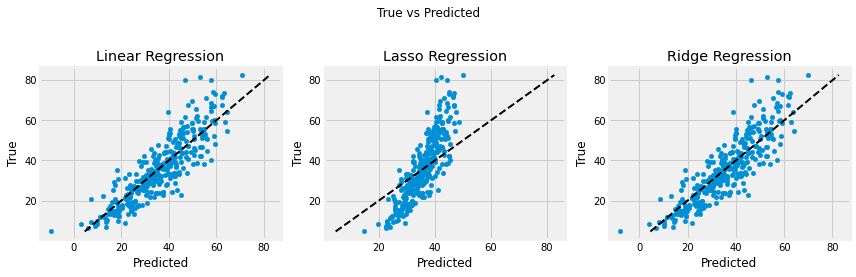

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(lr_pred, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<b>Observations</b>
- Ridge and Linear Regression fit well compared to Lasso

#### RidgeCV and Kfold for hyper param tuning on Ridge Reg.

In [46]:
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=random_state)
# define model
ridgecv_model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# # fit model
# ridgecv_model.fit(df, target)
# # summarize chosen configuration
# print('alpha: %f' % ridgecv_model.alpha_)

In [47]:
modl_perf("RidgeCV Regression",ridgecv_model,df, X_test)



RidgeCV Regression 	 RMSE: 7.87 	 MSE: 61.97 	 MAE: 6.01 	 Train R2 score: 0.78 	 Test R2 Score: 0.76


<b>Observations</b>
- R2 score is 0.80 and did not improve

#### Polynomial Features

In [48]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(df)
# ridge.fit(X_polytr,target)
# y_pred_lr2tr = lin_reg.predict(X_polytr)
# print("Training R2 - degree 2 polynomial: ",r2_score(target, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
# y_pred_lr2te= ridge.predict(X_polyte)
# print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

In [49]:
modl_perf("Degree 2 polynomial",ridge, X_polytr, X_polyte)



Degree 2 polynomial 	 RMSE: 6.65 	 MSE: 44.20 	 MAE: 5.02 	 Train R2 score: 0.83 	 Test R2 Score: 0.83


In [50]:
print(len(ridge.coef_))
print(ridge.coef_)

28
[  0.          -8.98466465   2.02363378   7.49236271  32.67618697
 -44.26168805   6.84290063  18.56759997  -2.84583185   5.09584541
  11.43028891  18.64283246 -14.20969084   7.31574376  -8.12396047
   8.12151428  -0.36954859  -5.69887755  -1.00323452  11.51176413
 -18.24396014   8.60406157  -1.10442294  -4.86268143   8.08646037
   0.42939371 -16.32063457   1.76527621]


<b>Observations</b>
- Polynomial degree 2 and then fit to a Ridge has a better R2 score (0.84) compared to normal LR

In [51]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(df)
# ridge.fit(X_polytr,target)
# y_pred_lr2tr = ridge.predict(X_polytr)
# print("Training R2 - degree 3 polynomial: ",r2_score(target, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
# y_pred_lr2te= ridge.predict(X_polyte)
# print("Test R2 - degree 3 polynomial: ",r2_score(y_test,y_pred_lr2te))

In [52]:
modl_perf("Degree 3 polynomial",ridge,X_polytr, X_polyte)



Degree 3 polynomial 	 RMSE: 6.39 	 MSE: 40.89 	 MAE: 4.76 	 Train R2 score: 0.85 	 Test R2 Score: 0.84


In [53]:
print(len(ridge.coef_))
# print(ridge.coef_)

84


<b>Observations</b>
- Polynomial degree 3 and then fit to a LR has a better R2 score (0.86) compared to normal LR and slightly better than Poly degree 2. But it is overfit and also number os features is almost 4 times. So not recommended.

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(knn_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(df, target)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

##### Best Params and estimating based on best params

In [55]:
best_params_grid = {}
best_params_grid['KNN Reg'] = grid_search.best_params_
best_params_grid['KNN Reg']

{'n_neighbors': 3, 'weights': 'distance'}

In [56]:
print(np.abs(grid_search.best_score_))

46.61788058684355


In [57]:
knn_hp_obj = KNeighborsRegressor(**best_params_grid['KNN Reg'])

In [58]:
knn_hp_obj

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [59]:
modl_perf("KNN Reg",knn_hp_obj,df, X_test)



KNN Reg 	 RMSE: 6.93 	 MSE: 47.98 	 MAE: 4.51 	 Train R2 score: 1.00 	 Test R2 Score: 0.82


In [60]:
from sklearn.svm import SVR

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]

svr_reg = SVR()

grid_search = GridSearchCV(svr_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(df, target)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

##### Best Params and estimating based on best params

In [61]:
best_params_grid = {}
best_params_grid['SVR Reg'] = grid_search.best_params_
best_params_grid['SVR Reg']

{'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}

In [62]:
print(np.abs(grid_search.best_score_))

37.58368594067344


In [63]:
svr_hp_obj = SVR(**best_params_grid['SVR Reg'])

In [64]:
svr_hp_obj

SVR(C=1000, gamma=0.9)

In [65]:
modl_perf("SVR Reg",svr_hp_obj,df, X_test)



SVR Reg 	 RMSE: 5.70 	 MSE: 32.44 	 MAE: 3.86 	 Train R2 score: 0.91 	 Test R2 Score: 0.88


#### Decison Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
# tree_reg.fit(df, target)
modl_perf("DT Reg",tree_reg,df, X_test)



DT Reg 	 RMSE: 6.66 	 MSE: 44.40 	 MAE: 4.42 	 Train R2 score: 1.00 	 Test R2 Score: 0.83


<b>Observations</b>
- R2 score (0.78). But it is overfit. Will regularize

In [67]:
# Dpred = tree_reg.predict(X_test)
# lin_mse = mean_squared_error(y_test, Dpred)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [68]:
# print('Test R2 score: ',r2_score(y_test,Dpred))

#### Using Cross Validation in DTR

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         df, 
                         target, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [70]:
tree_reg_rmse_scores.mean()

7.033124182904226

#### RandomForest - Hyperparam tuning using GridSearchCV 

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30,60,90,100], 'max_features': [2, 3,4,5]},
    {'bootstrap': [False], 'n_estimators': [3, 10,30,60,90,100], 'max_features': [2, 3, 4,5]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(df, target)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 60, 90, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 60, 90, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

##### Best Params and estimating based on best params

In [72]:
best_params_grid = {}
best_params_grid['RandomForest'] = grid_search.best_params_
best_params_grid['RandomForest']

{'bootstrap': False, 'max_features': 3, 'n_estimators': 30}

In [73]:
print(np.abs(grid_search.best_score_))

28.189048448332624


In [74]:
rf_hp_obj = RandomForestRegressor(random_state=random_state, **best_params_grid['RandomForest'])

In [75]:
rf_hp_obj

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=30,
                      random_state=42)

In [76]:
modl_perf("RF Reg",rf_hp_obj,df, X_test)



RF Reg 	 RMSE: 5.43 	 MSE: 29.44 	 MAE: 3.60 	 Train R2 score: 1.00 	 Test R2 Score: 0.89


#### Grdient Boosting - Hyperparams tuning using RandomizedSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.001,0.05,0.01, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=random_state), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5)
rs.fit(df, target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.001, 0.05, 0.01,
                                                          0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=2)

In [78]:
best_params_grid['GradientBoost'] = rs.best_params_
best_params_grid['GradientBoost']

{'subsample': 0.8,
 'n_estimators': 300,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

In [79]:
GB_hp_obj = GradientBoostingRegressor(random_state=random_state, **best_params_grid['GradientBoost'])
GB_hp_obj

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_leaf_nodes=9,
                          n_estimators=300, random_state=42, subsample=0.8)

In [80]:
modl_perf("Gradient Boost Reg",GB_hp_obj,df, X_test)



Gradient Boost Reg 	 RMSE: 5.04 	 MSE: 25.39 	 MAE: 3.45 	 Train R2 score: 0.98 	 Test R2 Score: 0.90


#### Computing 95% confidence interval for the test RMSE

In [81]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()
y_pred_gb = GB_hp_obj.predict(X_test)

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Train score: {rs.score(df, target)}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.8545701209457912
Mean validation score: 0.9171515545566937
Validation standard deviation: 0.23557929320045962
95% confidence interval: 0.455 <-> 1.379
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_leaf_nodes': 9, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.05, 'criterion': 'friedman_mse'}
Train score: 0.9769455914001831
Test score: 0.9027161180624556


In [82]:
print('Test R2 score:', rs.score(X_test, y_test))
print('Test Adjusted R2 score:', 1 - (1-rs.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Test R2 score: 0.9027161180624556
Test Adjusted R2 score: 0.9009201079343778


<b>Observations</b>
- Training R2 score of 0.99
- Testing R2 score of 0.91

#### XGB Regressor

In [83]:
# from xgboost import XGBRegressor

# xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=0.65, colsample_bytree=1, gamma=0.3,
#              importance_type='weight', learning_rate=0.2, max_delta_step=150,
#              max_depth=4, min_child_weight=0.5, missing=None, n_estimators=200,
#              n_jobs=1, nthread=None, objective='reg:squarederror', random_state=random_state,
#              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
#              silent=None, subsample=1, verbosity=1)

# xgb.fit(df,target)


from xgboost import XGBRegressor

param_grid = {
     'max_depth':[4,5,6],
     'min_child_weight':[4,5,6],
    'gamma':[i/10.0 for i in range(0,5)],
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.001,0.05,0.01, 0.1, 0.15, 0.2], 
     'subsample':[i/10.0 for i in range(6,10)],
     'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

xgb = RandomizedSearchCV(estimator=XGBRegressor(random_state=random_state), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5)

xgb.fit(df, target)


# xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=0.4, colsample_bytree=1, gamma=0.8,
#              importance_type='weight', learning_rate=0.1, max_delta_step=200,
#              max_depth=3, min_child_weight=0.3, missing=None, n_estimators=400,
#              n_jobs=1, nthread=None, objective='reg:squarederror', random_state=random_state,
#              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, 
#              silent=None, subsample=1, verbosity=1)

# xgb.fit(df,target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s


[16:46:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                      'friedman_mse'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'le

In [84]:
best_params_grid['XGB Reg'] = rs.best_params_
best_params_grid['XGB Reg']

{'subsample': 0.8,
 'n_estimators': 300,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

In [85]:
XGB_hp_obj = XGBRegressor(random_state=random_state, **best_params_grid['XGB Reg'])
XGB_hp_obj

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             criterion='friedman_mse', gamma=None, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=5,
             max_features=None, max_leaf_nodes=9, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=42,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=0.8, tree_method=None, validate_parameters=None,
             verbosity=None)

In [86]:
modl_perf("XGBoost Reg",XGB_hp_obj,df, X_test)

[16:46:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBoost Reg 	 RMSE: 4.91 	 MSE: 24.12 	 MAE: 3.18 	 Train R2 score: 0.99 	 Test R2 Score: 0.91


In [87]:
mean = xgb.best_score_
std = xgb.cv_results_['mean_test_score'].std()
y_pred_xgb = XGB_hp_obj.predict(X_test)

print(f"Mean training score: {xgb.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {xgb.best_params_}")
print(f"Train score: {xgb.score(df, target)}")
print(f"Test score: {xgb.score(X_test, y_test)}")

Mean training score: 0.17449170387080784
Mean validation score: 0.9212808105485253
Validation standard deviation: 1.5905719108308698
95% confidence interval: -2.196 <-> 4.039
Best parameters: {'subsample': 1.0, 'reg_alpha': 1e-05, 'n_estimators': 350, 'min_child_weight': 6, 'max_leaf_nodes': 2, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2, 'criterion': 'friedman_mse', 'colsample_bytree': 0.8}
Train score: 0.9925341275650472
Test score: 0.9063484853516969


In [88]:
print('Test R2 score:', xgb.score(X_test, y_test))
print('Test Adjusted R2 score:', 1 - (1-xgb.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Test R2 score: 0.9063484853516969
Test Adjusted R2 score: 0.9046195343120359


#### Computing 95% confidence interval for the test RMSE

In [89]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred_xgb - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3.79833885, 5.81526744])

#### Using z-scores

In [90]:
m = len(squared_errors)
mean = squared_errors.mean()

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(3.8030023991745, 5.812218692823787)

In [91]:
print('Test Adjusted R2 score:', 1 - (1-xgb.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Test Adjusted R2 score: 0.9046195343120359


In [92]:
allmodels_df = pd.DataFrame()
allmodels_df['Model_Name'] = model_nm
allmodels_df['Test RMSE'] = rmse
allmodels_df['Test MSE'] = mse
allmodels_df['Test MAE'] = mae
allmodels_df['Train R2 score'] = r2train
allmodels_df['Test R2 score'] = r2

In [93]:
allmodels_df.sort_values('Test R2 score',ascending=False,inplace=True)
allmodels_df

,Model_Name,Test RMSE,Test MSE,Test MAE,Train R2 score,Test R2 score
11,XGBoost Reg,4.911452,24.122357,3.176515,0.991273,0.907574
10,Gradient Boost Reg,5.038858,25.390090,3.445507,0.976946,0.902716
9,RF Reg,5.425961,29.441052,3.600160,0.998372,0.887195
7,SVR Reg,5.695929,32.443603,3.863062,0.911361,0.875690
5,Degree 3 polynomial,6.394452,40.889018,4.755027,0.852647,0.843331
4,Degree 2 polynomial,6.648575,44.203555,5.018773,0.833878,0.830631
8,DT Reg,6.663283,44.399336,4.419428,0.998372,0.829881
6,KNN Reg,6.926813,47.980743,4.505375,0.998372,0.816158
0,Linear Regression,7.871987,61.968186,6.008192,0.779403,0.762565
3,RidgeCV Regression,7.871987,61.968186,6.008192,0.779403,0.762565


<b>Observations</b>
- XGBoost and GradientBoost has better perofrmance compared to other models. 
- Training R2 score of 0.99
- Testing R2 score of 0.90
- Least RMSE is 4.91

In [94]:
check = X_test_beforeoutliers.copy()
check['Actual'] = y_test.copy()
check['Predicted'] = y_pred_gb.copy()
check['difference'] = np.abs(check['Actual']-check['Predicted'])
check.sort_values('difference',ascending=False,inplace=True)
check.to_csv('GradientBoost_all.csv', index=True)
check

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Actual,Predicted,difference
503,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.90,55.945908,33.045908
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75,49.691424,32.058576
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,63.621339,16.368661
924,297.0,0.0,0.0,186.0,0.0,1040.0,734.0,7,30.96,15.587450,15.372550
842,332.5,142.5,0.0,228.0,0.0,932.0,594.0,7,30.28,15.203267,15.076733
...,...,...,...,...,...,...,...,...,...,...,...
54,309.9,142.8,111.2,167.8,22.1,913.9,651.2,28,38.22,38.249129,0.029129
23,132.0,207.0,161.0,179.0,5.0,867.0,736.0,28,33.30,33.327705,0.027705
674,295.8,0.0,0.0,185.7,0.0,1091.4,769.3,28,25.22,25.241233,0.021233
434,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,120,39.38,39.364525,0.015475


<b>Observations</b>
- Highest difference (from predicted to actual) is ~22
- Most of the bigger differences are for age within 7 to 28 days

Text(0.5, 1.0, 'XGBoost Regression')

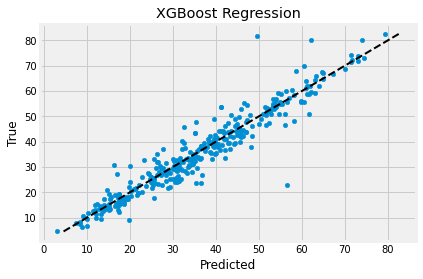

In [98]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,4))

ax1.scatter(y_pred_xgb, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("XGBoost Regression")

#### R Square
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean. But, it does not take into consideration overfitting. 

R Square measures how much variability in a dependent variable can be explained by the model. It is a good metric to determine the fit on dependent variables. 

For my best model - GradientBoost, 91% of data fit the regression model.



#### Root Mean Square Error (RMSE)
RMSE is the square root of the error function that the regression algorithms are trying to reduce. It is an absolute measure of how well the model fits the data.

#### Mean Absolute Error (MAE)
Similarly to RMSE, MAE looks at the sum of the value of errors. However, since we are not squaring the value and instead taking the absolute value, it is more forgiving to large prediction errors.

<b>Conclusion</b>
- In the EDA stage we explored statistics and whether the column has outliers or not. Performed further descriptive statistics to explore missing values and outliers. We also checked the relation between independent and dependent variables and observed that for some variables the relationship was linear. Used strategies such as visuals (boxplots), IQR method

- Through EDA we have discovered that cement, age and superplasticizer have a positive impact on the overall strength. Water is found to have a negative impact, but is often present in older concrete due to the curing processes.

- In the feature engineering stage, we identified opportunities to add features based on variable interaction and gaussians but ended up adding multicollinearity in the data.

- Using machine learning models we have simulated the compressive strength of concrete using combinations of ingredients and aging process

- Used cross validation method to compare linear and non-linear/tree-based models on training and validation sets.

- Here we tried **3 linear alg like: Linear, Lasso and Ridge; non linear algs like: KNN, SVR and Tree based alg like: decision tree-based regression methods such as Decision Tree, Random Forest, Gradient Boost**. We used **k-Fold cross validation, grid search and random search methods** to squeeze out the extra performance from the regressors. 

- To improve, perhaps decision trees, Ensemble models could be used to increase the prediction score.

- For some it resulted an improvement while for some it didn't owing to the limited hyperparameter space. For this specific problem, **XGBoost turned out to be the best performing model when used with 10-fold cross validation and grid/random search. But seems to be overfitting**

### Approach - 2

In [ ]:
cdf = pd.read_csv('concrete.csv')
print(cdf.shape)

In [ ]:
cdf.drop_duplicates(inplace=True)
cdf.shape

<b>Concrete Strength</b>: Reference - https://lafargeholcim.co.tz/why-concrete-strength-tests-are-performed-after-28-days/
- Standard grades of concrete will generally gain 16% of its strength after the first day, 40% after three days, 65% after seven days, 90% after 14 days and almost 100% after 28 days. This is why compressive strength tests are performed after 28 days. The concrete will be near-optimal strength and is unlikely to change much more after four weeks of curing.
- After this time, the rate of strengthening slows down considerably, gaining just one more percent of strength in a number of months after being poured. After the first two weeks, concrete only gains nine percent strength in the next two weeks, so the slowing of the rate begins after 14 days.
- Concrete takes about 12 months to reach almost 100% strength



##### Based on above, I decided to divide the dataset into 2 parts. One with age <=28 and other >28 days

#### For >28 days Age

In [129]:
cdf_G28 = cdf[cdf['age']>28]
cdf_L28 = cdf[cdf['age']<=28]
cdf = cdf_G28.copy()

In [130]:
data = cdf.drop(['strength'],axis=1)
label = cdf['strength'].copy()

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

df = X_train.copy()
target = y_train.copy()

(181, 8)
(181,)
(90, 8)
(90,)


#### Feature Engineering:

In [107]:
def preprocessing(df):
    #Adding a total column containing sum of each material in the concrete
    df['total'] = df['cement'] + df['slag'] + df['ash'] + df['water']+df['superplastic']+df['coarseagg']+df['fineagg']
    
    #Taking the % of each material in the total mixture
    df['cement/total'] = df['cement']/df['total']
    df['slag/total'] = df['slag']/df['total']
    df['ash/total'] = df['ash']/df['total']
    df['water/total'] = df['water']/df['total']
    df['superplastic/total'] = df['superplastic']/df['total']
    df['coarseagg/total'] = (df['coarseagg']/df['total'])
    df['fineagg/total'] = df['fineagg']/df['total']

    df.drop(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
           'fineagg','total'],axis=1,inplace=True)
       
    return df

In [108]:
def scaling(df):
    #Scaling
    df_withoutScale = df.copy()
    from sklearn.preprocessing import MinMaxScaler
    # cols_stnd = ['cement', 'water', 'coarseagg', 'fineagg', 'superplastic_log',
    #        'ash_log', 'slag_log']
    cols_stnd=df.columns
    # normalize traning set
    scaler = MinMaxScaler()
    scaler.fit_transform(df[cols_stnd])
    df.loc[:,cols_stnd] = scaler.transform(df[cols_stnd])
    return df,scaler

In [109]:
df = preprocessing(df)
# df,handle_outliers = outliertreatment(df)
numcols=df.columns
df,QTScaler = scaling(df)


In [110]:
df.head()

,age,cement/total,slag/total,ash/total,water/total,superplastic/total,coarseagg/total,fineagg/total
863,0.000000,0.677504,0.291418,0.000000,0.167449,0.353258,0.335203,0.597137
971,0.401294,0.575294,0.000000,0.000000,0.556427,0.000000,0.768353,0.533796
984,0.142395,0.148452,0.415324,0.741982,0.442435,0.251127,0.673212,0.409829
761,0.142395,0.354175,0.000000,0.686040,0.556598,0.187689,0.770496,0.447964
687,0.142395,0.148751,0.133825,0.711330,0.291256,0.344882,0.906881,0.519667


In [ ]:
# handle_outliers.head()

#### Applying the same for X_test

In [111]:
X_testOriginalG28 = X_test.copy()

X_test = preprocessing(X_test)
X_test.loc[:,numcols] = QTScaler.transform(X_test[numcols])
X_test.head()

,age,cement/total,slag/total,ash/total,water/total,superplastic/total,coarseagg/total,fineagg/total
124,0.000000,0.802802,0.075472,0.448309,0.310267,0.367329,0.476859,0.291847
401,0.110032,0.076780,0.660336,0.000000,0.555845,0.000000,0.766972,0.535296
283,0.110032,0.958871,0.000000,0.000000,0.983016,0.000000,0.606886,0.111425
443,0.000000,0.202181,0.000000,0.719988,0.365181,0.317689,0.919163,0.536371
696,0.401294,0.511865,0.000000,0.000000,0.642346,0.000000,0.660965,0.650933


### Model Fit

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(df, target)
lr_pred = lin_reg.predict(X_test)

modl_perf("G28-Linear Regression",lin_reg, df, X_test)



G28-Linear Regression 	 RMSE: 7.02 	 MSE: 49.30 	 MAE: 5.70 	 Train R2 score: 0.73 	 Test R2 Score: 0.67


In [113]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(df,target)
y_pred_ridge = ridge.predict(X_test)
modl_perf("G28-Ridge Reg Model",ridge,df, X_test)



G28-Ridge Reg Model 	 RMSE: 6.91 	 MSE: 47.77 	 MAE: 5.70 	 Train R2 score: 0.72 	 Test R2 Score: 0.68


In [114]:
#Decicion Tree
tree_reg = DecisionTreeRegressor()
# tree_reg.fit(df, target)
modl_perf("G28-DT Reg",tree_reg,df, X_test)



G28-DT Reg 	 RMSE: 5.82 	 MSE: 33.81 	 MAE: 4.25 	 Train R2 score: 1.00 	 Test R2 Score: 0.77


In [115]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'max_depth':[2,3,4,5,6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(df, target)

best_params_grid = {}
best_params_grid['RandomForest'] = grid_search.best_params_

rf_hp_obj = RandomForestRegressor(random_state=random_state, **best_params_grid['RandomForest'])

modl_perf("G28-RF Reg",rf_hp_obj,df, X_test)



G28-RF Reg 	 RMSE: 4.08 	 MSE: 16.66 	 MAE: 3.04 	 Train R2 score: 0.98 	 Test R2 Score: 0.89


In [116]:
#Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.01,0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3], 
#     'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 9)),
    'n_estimators': list(range(50, 300, 50)),
    'subsample': [0.2,0.4,0.6,0.8, 0.9, 1.0]
}

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=random_state), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5, n_iter=500)
rs.fit(df, target)
best_params_grid['GradientBoost'] = rs.best_params_
GB_hp_obj = GradientBoostingRegressor(random_state=random_state, **best_params_grid['GradientBoost'])
modl_perf("G28-Gradient Boost Reg",GB_hp_obj,df, X_test)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1938 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.1min finished




G28-Gradient Boost Reg 	 RMSE: 3.67 	 MSE: 13.50 	 MAE: 2.55 	 Train R2 score: 1.00 	 Test R2 Score: 0.91


In [117]:
#XGBoost
from xgboost import XGBRegressor

xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.4, colsample_bytree=0.8, gamma=0.7,
             importance_type='weight', learning_rate=0.1, max_delta_step=200,
             max_depth=3, min_child_weight=0.3, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=random_state,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, 
             silent=None, subsample=1, verbosity=1)

xgb.fit(df,target)
modl_perf("G28-XGBoost Reg",xgb,df, X_test)
y_pred_xgbte = xgb.predict(X_test)



G28-XGBoost Reg 	 RMSE: 3.24 	 MSE: 10.47 	 MAE: 2.33 	 Train R2 score: 1.00 	 Test R2 Score: 0.93


In [118]:
check = X_testOriginalG28.copy()
check['Actual'] = y_test.copy()
check['Predicted'] = y_pred_xgbte.copy()
check['difference'] = np.abs(check['Actual']-check['Predicted'])
check.sort_values('difference',ascending=False,inplace=True)
check.to_csv('XGBoost_outputbeforeOutliers_G28.csv', index=True)
check

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Actual,Predicted,difference
537,387.0,20.0,94.0,157.0,13.9,938.0,845.0,56,47.97,57.295650,9.325650
52,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,56,37.27,46.461483,9.191483
590,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,100,45.37,53.361904,7.991904
174,393.0,0.0,0.0,192.0,0.0,940.6,785.6,90,48.85,40.907021,7.942979
758,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39,35.963387,7.426613
...,...,...,...,...,...,...,...,...,...,...,...
861,310.0,0.0,0.0,192.0,0.0,970.0,850.0,180,37.33,37.450066,0.120066
81,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90,31.02,30.901991,0.118009
302,342.0,38.0,0.0,228.0,0.0,932.0,670.0,180,52.12,52.008766,0.111234
707,331.0,0.0,0.0,192.0,0.0,978.0,825.0,90,37.23,37.161968,0.068032


<b>Observation:</b>
- Maximum difference between Actual and predicted is 9.37

Text(0.5, 1.0, 'XGBoost Regression')

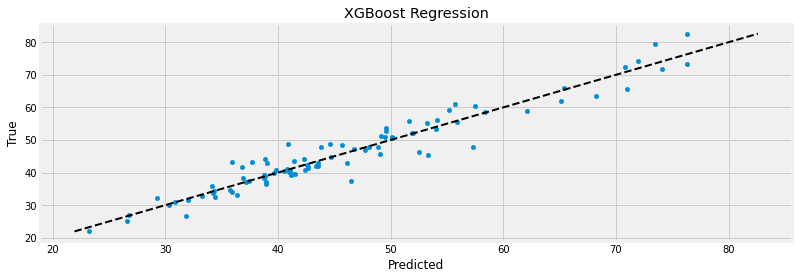

In [119]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,4))

ax1.scatter(y_pred_xgbte, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("XGBoost Regression")

In [120]:
allmodels_df = pd.DataFrame()
allmodels_df['Model_Name'] = model_nm
allmodels_df['Test RMSE'] = rmse
allmodels_df['Test MSE'] = mse
allmodels_df['Test MAE'] = mae
allmodels_df['Train R2 score'] = r2train
allmodels_df['Test R2 score'] = r2

In [121]:
allmodels_df.sort_values('Test R2 score',ascending=False,inplace=True)
allmodels_df

,Model_Name,Test RMSE,Test MSE,Test MAE,Train R2 score,Test R2 score
17,G28-XGBoost Reg,3.236340,10.473896,2.327947,0.996319,0.929037
16,G28-Gradient Boost Reg,3.673774,13.496616,2.552254,0.998178,0.908558
11,XGBoost Reg,4.911452,24.122357,3.176515,0.991273,0.907574
10,Gradient Boost Reg,5.038858,25.390090,3.445507,0.976946,0.902716
9,RF Reg,5.425961,29.441052,3.600160,0.998372,0.887195
15,G28-RF Reg,4.081553,16.659079,3.036547,0.981130,0.887132
7,SVR Reg,5.695929,32.443603,3.863062,0.911361,0.875690
5,Degree 3 polynomial,6.394452,40.889018,4.755027,0.852647,0.843331
4,Degree 2 polynomial,6.648575,44.203555,5.018773,0.833878,0.830631
8,DT Reg,6.663283,44.399336,4.419428,0.998372,0.829881


<b>Observation:</b>
- G28 - XGBoost is the highest. Test R2score is 0.92
- Min. RMSE is 3.23

#### For <=28 days Age

In [132]:
# cdf_G28 = cdf[cdf['age']>28]
# cdf_L28 = cdf[cdf['age']<=28]
cdf = cdf_L28.copy()

In [133]:
data = cdf.drop(['strength'],axis=1)
label = cdf['strength'].copy()

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

df = X_train.copy()
target = y_train.copy()

(491, 8)
(491,)
(243, 8)
(243,)


#### Feature Engineering:

In [134]:
df = preprocessing(df)
numcols=df.columns
df,QTScaler = scaling(df)

In [135]:
df.head()

,age,cement/total,slag/total,ash/total,water/total,superplastic/total,coarseagg/total,fineagg/total
117,1.000000,0.136814,0.369953,0.596913,0.455680,0.211488,0.090724,0.806197
792,0.222222,0.553975,0.000000,0.000000,0.528734,0.000000,0.441870,0.713510
516,0.222222,0.240566,0.880750,0.000000,0.606694,0.000000,0.537074,0.152036
631,0.074074,0.780184,0.066472,0.370399,0.264350,0.367329,0.423709,0.291847
960,0.074074,0.328956,0.000000,0.465599,0.149440,0.390321,0.526299,0.748983


#### Applying the same for X_test

In [136]:
X_testOriginalL28 = X_test.copy()

X_test = preprocessing(X_test)
X_test.loc[:,numcols] = QTScaler.transform(X_test[numcols])
X_test.head()

,age,cement/total,slag/total,ash/total,water/total,superplastic/total,coarseagg/total,fineagg/total
794,1.000000,0.123607,0.000000,0.557038,0.491714,0.268727,0.688829,0.676711
39,1.000000,0.143896,0.212631,0.797237,0.298491,0.254713,0.605927,0.472526
392,0.222222,0.716145,0.289723,0.000000,0.189345,0.514165,0.024335,0.695168
277,1.000000,0.420332,0.338597,0.446578,0.521269,0.232010,0.497315,0.253430
267,1.000000,0.106013,0.672133,0.000000,0.615143,0.113353,0.124328,0.807657


### Model Fit

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(df, target)
lr_pred = lin_reg.predict(X_test)

modl_perf("L28-Linear Regression",lin_reg, df, X_test)



L28-Linear Regression 	 RMSE: 7.03 	 MSE: 49.38 	 MAE: 5.43 	 Train R2 score: 0.78 	 Test R2 Score: 0.78


In [138]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(df,target)
y_pred_ridge = ridge.predict(X_test)
modl_perf("L28-Ridge Reg Model",ridge,df, X_test)



L28-Ridge Reg Model 	 RMSE: 7.05 	 MSE: 49.63 	 MAE: 5.30 	 Train R2 score: 0.78 	 Test R2 Score: 0.77


In [139]:
#Decicion Tree
tree_reg = DecisionTreeRegressor()
# tree_reg.fit(df, target)
modl_perf("L28-DT Reg",tree_reg,df, X_test)



L28-DT Reg 	 RMSE: 7.48 	 MSE: 55.90 	 MAE: 5.00 	 Train R2 score: 1.00 	 Test R2 Score: 0.75


In [140]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'max_depth':[2,3,4,5,6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(df, target)

best_params_grid = {}
best_params_grid['RandomForest'] = grid_search.best_params_

rf_hp_obj = RandomForestRegressor(random_state=random_state, **best_params_grid['RandomForest'])

modl_perf("L28-RF Reg",rf_hp_obj,df, X_test)



L28-RF Reg 	 RMSE: 6.30 	 MSE: 39.75 	 MAE: 4.35 	 Train R2 score: 0.98 	 Test R2 Score: 0.82


In [141]:
#Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.01,0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3], 
#     'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 9)),
    'n_estimators': list(range(50, 300, 50)),
    'subsample': [0.2,0.4,0.6,0.8, 0.9, 1.0]
}

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=random_state), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5, n_iter=500)
rs.fit(df, target)
best_params_grid['GradientBoost'] = rs.best_params_
GB_hp_obj = GradientBoostingRegressor(random_state=random_state, **best_params_grid['GradientBoost'])
modl_perf("L28-Gradient Boost Reg",GB_hp_obj,df, X_test)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2017 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.8min finished




L28-Gradient Boost Reg 	 RMSE: 5.81 	 MSE: 33.70 	 MAE: 3.87 	 Train R2 score: 0.98 	 Test R2 Score: 0.85


In [142]:
#XGBoost
from xgboost import XGBRegressor

xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.4, colsample_bytree=0.8, gamma=0.7,
             importance_type='weight', learning_rate=0.1, max_delta_step=200,
             max_depth=3, min_child_weight=0.3, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=random_state,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, 
             silent=None, subsample=1, verbosity=1)

xgb.fit(df,target)
modl_perf("L28-XGBoost Reg",xgb,df, X_test)
y_pred_xgb = xgb.predict(X_test)



L28-XGBoost Reg 	 RMSE: 5.29 	 MSE: 27.99 	 MAE: 3.39 	 Train R2 score: 0.99 	 Test R2 Score: 0.87


In [143]:
check = X_testOriginalL28.copy()
check['Actual'] = y_test.copy()
check['Predicted'] = y_pred_xgb.copy()
check['difference'] = np.abs(check['Actual']-check['Predicted'])
check.sort_values('difference',ascending=False,inplace=True)
check.to_csv('XGBoost_L28.csv', index=True)
check

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Actual,Predicted,difference
503,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.90,46.412132,23.512132
95,475.0,0.0,59.0,142.0,1.9,1098.0,641.0,28,57.23,80.030174,22.800174
50,200.0,200.0,0.0,190.0,0.0,1145.0,660.0,28,49.25,26.544054,22.705946
824,250.0,180.0,95.0,159.0,9.5,860.0,800.0,28,67.87,45.511620,22.358380
491,275.0,180.0,120.0,162.0,10.4,830.0,765.0,28,76.24,57.595528,18.644472
...,...,...,...,...,...,...,...,...,...,...,...
315,150.7,0.0,185.3,166.7,15.6,1074.5,678.0,28,13.46,13.304152,0.155848
380,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02,28.165810,0.145810
513,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,15.219857,0.129857
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53,22.520842,0.009158


<b>Observation:</b>
- Maximum difference between Actual and predicted is 24.4

Text(0.5, 1.0, 'XGBoost Regression')

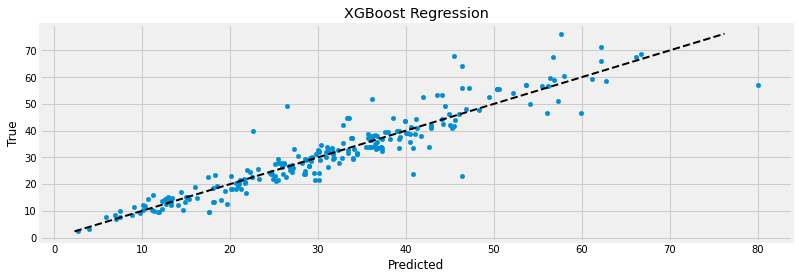

In [144]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,4))

ax1.scatter(y_pred_xgb, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("XGBoost Regression")

In [145]:
allmodels_df = pd.DataFrame()
allmodels_df['Model_Name'] = model_nm
allmodels_df['Test RMSE'] = rmse
allmodels_df['Test MSE'] = mse
allmodels_df['Test MAE'] = mae
allmodels_df['Train R2 score'] = r2train
allmodels_df['Test R2 score'] = r2

In [146]:
allmodels_df.sort_values('Test R2 score',ascending=False,inplace=True)
allmodels_df

,Model_Name,Test RMSE,Test MSE,Test MAE,Train R2 score,Test R2 score
17,G28-XGBoost Reg,3.236340,10.473896,2.327947,0.996319,0.929037
16,G28-Gradient Boost Reg,3.673774,13.496616,2.552254,0.998178,0.908558
11,XGBoost Reg,4.911452,24.122357,3.176515,0.991273,0.907574
10,Gradient Boost Reg,5.038858,25.390090,3.445507,0.976946,0.902716
9,RF Reg,5.425961,29.441052,3.600160,0.998372,0.887195
15,G28-RF Reg,4.081553,16.659079,3.036547,0.981130,0.887132
7,SVR Reg,5.695929,32.443603,3.863062,0.911361,0.875690
23,L28-XGBoost Reg,5.290103,27.985188,3.389769,0.989020,0.872737
22,L28-Gradient Boost Reg,5.805167,33.699964,3.869959,0.984203,0.846748
5,Degree 3 polynomial,6.394452,40.889018,4.755027,0.852647,0.843331


<b>Observation:</b>
- L28 - XGBoost is the highest. Test R2score is 0.87
- Min. RMSE is 5.29